In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
plt.style.use(mplhep.style.CMS)

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

save_figures = False

Welcome to JupyROOT 6.22/06
{'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}
Luminosity: 37.190432966


In [3]:
help( process_data_protons_multiRP )

Help on function process_data_protons_multiRP in module processing:

process_data_protons_multiRP(df_protons_multiRP, df_ppstracks=None, apply_fiducial=True, within_aperture=False, random_protons=False, mix_protons=False, select_2protons=True, runOnMC=False)



In [ ]:
# def get_data( fileNames ):
    
#     df_protons_multiRP_list = []
#     df_protons_singleRP_list = []
#     df_ppstracks_list = []
#     df_counts_list = []

#     for file_ in fileNames:
#         print ( file_ )
#         with h5py.File( file_, 'r' ) as f:
#             print ( list(f.keys()) )

#             dset_protons_multiRP = f['protons_multiRP']
#             print ( dset_protons_multiRP.shape )
#             print ( dset_protons_multiRP[:,:] )

#             dset_protons_singleRP = f['protons_singleRP']
#             print ( dset_protons_singleRP.shape )
#             print ( dset_protons_singleRP[:,:] )

#             dset_ppstracks = f['ppstracks']
#             print ( dset_ppstracks.shape )
#             print ( dset_ppstracks[:,:] )

#             dset_columns_protons = f['columns_protons']
#             print ( dset_columns_protons.shape )
#             columns_protons = list( dset_columns_protons )
#             print ( columns_protons )
#             columns_protons_str = [ item.decode("utf-8") for item in columns_protons ]
#             print ( columns_protons_str )

#             dset_columns_ppstracks = f['columns_ppstracks']
#             print ( dset_columns_ppstracks.shape )
#             columns_ppstracks = list( dset_columns_ppstracks )
#             print ( columns_ppstracks )
#             columns_ppstracks_str = [ item.decode("utf-8") for item in columns_ppstracks ]
#             print ( columns_ppstracks_str )

#             dset_selections = f['selections']
#             selections_ = [ item.decode("utf-8") for item in dset_selections ]
#             print ( selections_ )

#             dset_counts = f['event_counts']
#             df_counts_list.append( pd.Series( dset_counts, index=selections_ ) )
#             print ( df_counts_list[-1] )

#             chunk_size = 1000000
#             entries_protons_multiRP = dset_protons_multiRP.shape[0]
#             start_ = list( range( 0, entries_protons_multiRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_multiRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_multiRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_multiRP_list.append( df_ )
#                 print ( df_protons_multiRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_multiRP_list[-1] ) ) )

#             entries_protons_singleRP = dset_protons_singleRP.shape[0]
#             start_ = list( range( 0, entries_protons_singleRP, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_protons_singleRP )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_protons_singleRP[ start_[idx] : stop_[idx] ], columns=columns_protons_str ).astype(
#                                         { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "ismultirp": "int32", "rpid": "int32", "arm": "int32",
#                                           "muon0_charge": "int32",
#                                           "nVertices": "int32",
#                                           "num_bjets_ak8": "int32", "num_bjets_ak4": "int32", "num_jets_ak4": "int32",
#                                           "pfcand_nextracks": "int32", "pfcand_nextracks_noDRl": "int32" } )
#                 df_protons_singleRP_list.append( df_ )
#                 print ( df_protons_singleRP_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_protons_singleRP_list[-1] ) ) )

#             entries_ppstracks = dset_ppstracks.shape[0]
#             start_ = list( range( 0, entries_ppstracks, chunk_size ) )
#             stop_ = start_[1:]
#             stop_.append( entries_ppstracks )
#             print ( start_ )
#             print ( stop_ )
#             for idx in range( len( start_ ) ):
#                 print ( start_[idx], stop_[idx] )
#                 #print ( dset[ start_[idx] : stop_[idx] ] )
#                 df_ = pd.DataFrame( dset_ppstracks[ start_[idx] : stop_[idx] ], columns=columns_ppstracks_str ).astype( { "run": "int64", "lumiblock": "int64", "event": "int64", "slice": "int32", "rpid": "int32" } )
#                 df_ppstracks_list.append( df_ )
#                 print ( df_ppstracks_list[-1].head() )
#                 print ( "Data set size: {}".format( len( df_ppstracks_list[-1] ) ) )

#     df_counts = df_counts_list[0]
#     for idx in range( 1, len( df_counts_list ) ):
#         df_counts = df_counts.add( df_counts_list[idx] )
#     print ( df_counts )

#     df_protons_multiRP = pd.concat( df_protons_multiRP_list )
#     print (df_protons_multiRP)

#     df_protons_singleRP = pd.concat( df_protons_singleRP_list )
#     print (df_protons_singleRP)

#     df_ppstracks = pd.concat( df_ppstracks_list )
#     print (df_ppstracks)
    
#     return (df_counts, df_protons_multiRP, df_protons_singleRP, df_ppstracks)

In [ ]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

In [ ]:
# # Per data period, arm=(0,1)
# # Periods: "2016_preTS2", "2016_postTS2", "2017_preTS2", "2017_postTS2", "2018"
# def aperture_parametrisation( period, arm, xangle, xi ):

#     #https://github.com/cms-sw/cmssw/tree/916cb3d20213734a0465240720c8c8c392b92eac/Validation/CTPPS/python/simu_config

#     if (period == "2016_preTS2"):
#         if   (arm == 0): return 3.76296E-05+((xi<0.117122)*0.00712775+(xi>=0.117122)*0.0148651)*(xi-0.117122);
#         elif (arm == 1): return 1.85954E-05+((xi<0.14324)*0.00475349+(xi>=0.14324)*0.00629514)*(xi-0.14324);
#     elif (period == "2016_postTS2"):
#         if   (arm == 0): return 6.10374E-05+((xi<0.113491)*0.00795942+(xi>=0.113491)*0.01935)*(xi-0.113491);
#         elif (arm == 1): return (xi-0.110)/130.0;
#     elif (period == "2017_preTS2"):
#         if   (arm == 0): return -(8.71198E-07*xangle-0.000134726)+((xi<(0.000264704*xangle+0.081951))*-(4.32065E-05*xangle-0.0130746)+(xi>=(0.000264704*xangle+0.081951))*-(0.000183472*xangle-0.0395241))*(xi-(0.000264704*xangle+0.081951));
#         elif (arm == 1): return 3.43116E-05+((xi<(0.000626936*xangle+0.061324))*0.00654394+(xi>=(0.000626936*xangle+0.061324))*-(0.000145164*xangle-0.0272919))*(xi-(0.000626936*xangle+0.061324));
#     elif (period == "2017_postTS2"):
#         if   (arm == 0): return -(8.92079E-07*xangle-0.000150214)+((xi<(0.000278622*xangle+0.0964383))*-(3.9541e-05*xangle-0.0115104)+(xi>=(0.000278622*xangle+0.0964383))*-(0.000108249*xangle-0.0249303))*(xi-(0.000278622*xangle+0.0964383));
#         elif (arm == 1): return 4.56961E-05+((xi<(0.00075625*xangle+0.0643361))*-(3.01107e-05*xangle-0.00985126)+(xi>=(0.00075625*xangle+0.0643361))*-(8.95437e-05*xangle-0.0169474))*(xi-(0.00075625*xangle+0.0643361));
#     elif (period == "2018"):
#         if   (arm == 0): return -(8.44219E-07*xangle-0.000100957)+((xi<(0.000247185*xangle+0.101599))*-(1.40289E-05*xangle-0.00727237)+(xi>=(0.000247185*xangle+0.101599))*-(0.000107811*xangle-0.0261867))*(xi-(0.000247185*xangle+0.101599));
#         elif (arm == 1): return -(-4.74758E-07*xangle+3.0881E-05)+((xi<(0.000727859*xangle+0.0722653))*-(2.43968E-05*xangle-0.0085461)+(xi>=(0.000727859*xangle+0.0722653))*-(7.19216E-05*xangle-0.0148267))*(xi-(0.000727859*xangle+0.0722653));
#     else:
#         return -999.

# def check_aperture( period, arm, xangle, xi, theta_x ):
#     return ( theta_x < -aperture_parametrisation( period, arm, xangle, xi ) )

In [ ]:
# def process_data_protons_multiRP( df_protons_multiRP, df_ppstracks=None, runOnMC=False ):

#     if not runOnMC:
#         df_protons_multiRP.loc[ :, "period" ] = np.nan
#         for idx_ in range( df_run_ranges.shape[0] ):
#             msk_period_ = ( ( df_protons_multiRP.loc[ :, "run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_protons_multiRP.loc[ :, "run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#             sum_period_ = np.sum( msk_period_ )
#             if sum_period_ > 0:
#                 period_key_ = df_run_ranges.index[ idx_ ]
#                 df_protons_multiRP.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#                 print ( "{}: {}".format( period_key_, sum_period_ ) )

#         df_protons_multiRP.loc[ :, "within_aperture" ] = df_protons_multiRP.apply(
#                 lambda row: check_aperture( aperture_period_map[ row["period"] ], row["arm"], 120., row["xi"], row["thx"] ), # FIXME
#                 axis=1
#                 )
    
#     df_protons_multiRP_index = df_protons_multiRP.set_index( ['run', 'lumiblock', 'event', 'slice'] )

#     df_ppstracks_index = None
#     if not df_ppstracks is None:
#         df_ppstracks_index = df_ppstracks.set_index( ['run', 'lumiblock', 'event', 'slice'] )
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_x2" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y1" ] = np.nan
#         df_protons_multiRP_index.loc[ :, "track_y2" ] = np.nan
        
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 3 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 0 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 23 ]
#         df_protons_multiRP_index.loc[ :, "track_x1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_x2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "x"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]
#         df_protons_multiRP_index.loc[ :, "track_y1" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 103 ]
#         df_protons_multiRP_index.loc[ :, "track_y2" ].loc[ df_protons_multiRP_index.loc[ :, "arm" ] == 1 ] = df_ppstracks_index.loc[:, "y"].loc[ df_ppstracks_index.loc[ :, "rpid" ] == 123 ]

#     df_protons_multiRP_events = df_protons_multiRP_index.drop( columns=[ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm" ] )
#     df_protons_multiRP_events = df_protons_multiRP_events[ ~df_protons_multiRP_events.index.duplicated(keep='first') ]

#     df_protons_multiRP_events.loc[ :, "MX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 13000. * np.sqrt( df_.iloc[0].xi * df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "YX" ] = df_protons_multiRP_index.groupby( ["run","lumiblock","event","slice"] ).apply( lambda df_: 0.5 * np.log( df_.iloc[0].xi / df_.iloc[1].xi ) )
#     df_protons_multiRP_events.loc[ :, "diffMWW_MX" ]  = df_protons_multiRP_events[ "recoMWW" ] - df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "ratioMWW_MX" ] = df_protons_multiRP_events[ "recoMWW" ] / df_protons_multiRP_events[ "MX" ]
#     df_protons_multiRP_events.loc[ :, "shiftedRatioMWW_MX" ] = df_protons_multiRP_events[ "ratioMWW_MX" ] - 1.
#     df_protons_multiRP_events.loc[ :, "diffYWW_YX" ]  = df_protons_multiRP_events[ "recoRapidityWW" ] - df_protons_multiRP_events[ "YX" ]
    
#     return (df_protons_multiRP_index, df_protons_multiRP_events, df_ppstracks_index)

### Signal

In [4]:
run_tables = False

# labels_signals = [ "GGToWW-AQGC-A0W1e-6" ]
labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]

fileNames_signals = {
    "GGToWW-AQGC-A0W1e-6": [ "output-GGToWW-AQGC-A0W1e-6.h5" ],
    "GGToWW-AQGC-A0W2e-6": [ "output-GGToWW-AQGC-A0W2e-6.h5" ],
    "GGToWW-AQGC-A0W5e-6": [ "output-GGToWW-AQGC-A0W5e-6.h5" ]
    }

df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}

for label_ in labels_signals:
    import time
    print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
    time_s_ = time.time()

    #df_counts_signal, df_protons_multiRP_signal, df_protons_singleRP_signal, df_ppstracks_signal = 4 * [None]
    #df_protons_multiRP_signal_index, df_protons_multiRP_signal_events, df_ppstracks_signal_index = 3 * [None]

    if run_tables:
        with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), complevel=5 ) as store_:

            df_counts_signal_, df_protons_multiRP_signal_, df_protons_singleRP_signal_, df_ppstracks_signal_ = get_data( fileNames_signals[ label_ ] )
            df_protons_multiRP_signal_index_, df_protons_multiRP_signal_events_, df_ppstracks_signal_index_ = process_data_protons_multiRP( df_protons_multiRP_signal_, df_ppstracks_signal_, apply_fiducial=True, within_aperture=True, select_2protons=False, runOnMC=True )

            store_[ "counts" ] = df_counts_signal_
            store_[ "protons_multiRP"] = df_protons_multiRP_signal_index_
            store_[ "events_multiRP" ] = df_protons_multiRP_signal_events_
    
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
        df_counts_signals[ label_ ] = store_[ "counts" ]
        df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
        df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

    time_e_ = time.time()
    print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/05/14 17:52:41
Total time elapsed: 2
2021/05/14 17:52:43
Total time elapsed: 3
2021/05/14 17:52:46
Total time elapsed: 7


In [5]:
for label_ in labels_signals:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label_ ), 'r' ) as store_:
        print ( list( store_ ) )

['/counts', '/events_multiRP', '/protons_multiRP']
['/counts', '/events_multiRP', '/protons_multiRP']
['/counts', '/events_multiRP', '/protons_multiRP']


In [6]:
label_ = "GGToWW-AQGC-A0W1e-6"
df_counts_signals[ label_ ]

All       34159
Jet       34159
Muon      17498
Proton    12552
dtype: int64

In [7]:
df_signals_protons_multiRP_index[ label_ ]

crossingAngle        xi       thx       thy  \
run lumiblock event  slice                                                
1   2266      226549 0              120.0  0.049396  0.000070  0.000006   
              226551 0              120.0  0.047449  0.000007  0.000021   
                     0              120.0  0.051457  0.000022  0.000089   
    2267      226605 0              120.0  0.129090  0.000042 -0.000010   
              226690 0              120.0  0.028568  0.000061 -0.000014   
    2268      226716 0              150.0  0.164051 -0.000072 -0.000019   
              226773 0              150.0  0.044415 -0.000016  0.000041   
    2270      226932 0              130.0  0.032306  0.000006 -0.000075   
                     0              130.0  0.119526 -0.000012  0.000005   
    2273      227227 0              130.0  0.056667 -0.000025 -0.000072   
                     0              130.0  0.053138 -0.000011 -0.000024   
    2274      227321 0              150.0  0.082597  0.000042 -0.000018   
              227328 0              150.0  0.141799 -0.000062  0.000005   
              227324 0              150.0  0.057238 -0.000019  0.000045   
    2275      227457 0              150.0  0.068920 -0.000051  0.000024   
                     0              150.0  0.115064  0.000022  0.000018   
    2276      227546 0              140.0  0.090561 -0.000041  0.000076   
                     0              140.0  0.125299 -0.000021  0.000054   
              227579 0              140.0  0.118551 -0.000022 -0.000012   
                     0              140.0  0.169634 -0.000121 -0.000032   
    2277      227611 0              130.0  0.037509  0.000041  0.000004   
              227610 0              130.0  0.088627 -0.000125 -0.000004   
              227661 0              130.0  0.057884  0.000036  0.000051   
    2278      227745 0              150.0  0.084094 -0.000080 -0.000087   
    2279      227825 0              130.0  0.067304 -0.000003  0.000013   
              227868 0              130.0  0.062334  0.000017  0.000011   
    2280      227969 0              120.0  0.085506  0.000025  0.000011   
    2282      228117 0              130.0  0.037401  0.000059  0.000036   
                     0              130.0  0.058293  0.000015  0.000080   
              228121 0              130.0  0.100883 -0.000009 -0.000044   
...                                   ...       ...       ...       ...   
    9019      401833 0              130.0  0.128527 -0.000033 -0.000013   
              401874 0              130.0  0.033579 -0.000103 -0.000091   
                     0              130.0  0.084197  0.000007  0.000073   
    9021      402066 0              119.0  0.036611  0.000072  0.000042   
                     0              119.0  0.046874  0.000018  0.000021   
              402070 0              119.0  0.042629  0.000002  0.000039   
              402092 0              119.0  0.102647 -0.000046  0.000074   
    9024      402306 0              150.0  0.101640  0.000058  0.000090   
              402311 0              150.0  0.108578 -0.000074  0.000040   
              402331 0              150.0  0.107441  0.000044  0.000004   
              402381 0              150.0  0.100368 -0.000052 -0.000037   
    9026      402504 0              150.0  0.041278  0.000096 -0.000116   
    9039      403821 0              130.0  0.102213  0.000027  0.000032   
    9041      404017 0              130.0  0.057910 -0.000056 -0.000008   
              404092 0              130.0  0.075079  0.000072 -0.000071   
              404091 0              130.0  0.132769 -0.000061  0.000051   
    9042      404200 0              140.0  0.089057  0.000003  0.000123   
    9043      404249 0              140.0  0.099805  0.000084  0.000034   
    9049      404804 0              120.0  0.086237  0.000060  0.000043   
              404867 0              120.0  0.117212 -0.000054  0.000115   
              404859 0              120.0  0.069489 -

In [8]:
df_signals_protons_multiRP_index[ label_ ][ [ "xi", "thx", "thy", "t", "ismultirp", "rpid", "arm", "random", "trackpixshift1", "rpid1", "trackpixshift2", "rpid2", "trackx1", "trackx2", "tracky1", "tracky2" ] ]

xi       thx       thy         t  ismultirp  \
run lumiblock event  slice                                                      
1   2266      226549 0      0.049396  0.000070  0.000006 -0.202391          1   
              226551 0      0.047449  0.000007  0.000021 -0.022129          1   
                     0      0.051457  0.000022  0.000089 -0.342805          1   
    2267      226605 0      0.129090  0.000042 -0.000010 -0.086362          1   
              226690 0      0.028568  0.000061 -0.000014 -0.162398          1   
    2268      226716 0      0.164051 -0.000072 -0.000019 -0.226659          1   
              226773 0      0.044415 -0.000016  0.000041 -0.081292          1   
    2270      226932 0      0.032306  0.000006 -0.000075 -0.234367          1   
                     0      0.119526 -0.000012  0.000005 -0.020655          1   
    2273      227227 0      0.056667 -0.000025 -0.000072 -0.233687          1   
                     0      0.053138 -0.000011 -0.000024 -0.030825          1   
    2274      227321 0      0.082597  0.000042 -0.000018 -0.086781          1   
              227328 0      0.141799 -0.000062  0.000005 -0.161479          1   
              227324 0      0.057238 -0.000019  0.000045 -0.099979          1   
    2275      227457 0      0.068920 -0.000051  0.000024 -0.129756          1   
                     0      0.115064  0.000022  0.000018 -0.042887          1   
    2276      227546 0      0.090561 -0.000041  0.000076 -0.292089          1   
                     0      0.125299 -0.000021  0.000054 -0.142210          1   
              227579 0      0.118551 -0.000022 -0.000012 -0.037683          1   
                     0      0.169634 -0.000121 -0.000032 -0.583498          1   
    2277      227611 0      0.037509  0.000041  0.000004 -0.071968          1   
              227610 0      0.088627 -0.000125 -0.000004 -0.614065          1   
              227661 0      0.057884  0.000036  0.000051 -0.158605          1   
    2278      227745 0      0.084094 -0.000080 -0.000087 -0.548091          1   
    2279      227825 0      0.067304 -0.000003  0.000013 -0.011687          1   
              227868 0      0.062334  0.000017  0.000011 -0.020236          1   
    2280      227969 0      0.085506  0.000025  0.000011 -0.035329          1   
    2282      228117 0      0.037401  0.000059  0.000036 -0.195481          1   
                     0      0.058293  0.000015  0.000080 -0.266754          1   
              228121 0      0.100883 -0.000009 -0.000044 -0.086406          1   
...                              ...       ...       ...       ...        ...   
    9019      401833 0      0.128527 -0.000033 -0.000013 -0.062240          1   
              401874 0      0.033579 -0.000103 -0.000091 -0.770512          1   
                     0      0.084197  0.000007  0.000073 -0.213555          1   
    9021      402066 0      0.036611  0.000072  0.000042 -0.282051          1   
                     0      0.046874  0.000018  0.000021 -0.032829          1   
              402070 0      0.042629  0.000002  0.000039 -0.065000          1   
              402092 0      0.102647 -0.000046  0.000074 -0.302056          1   
    9024      402306 0      0.101640  0.000058  0.000090 -0.444098          1   
              402311 0      0.108578 -0.000074  0.000040 -0.278426          1   
              402331 0      0.107441  0.000044  0.000004 -0.084092          1   
              402381 0      0.100368 -0.000052 -0.000037 -0.163561          1   
    9026      402504 0      0.041278  0.000096 -0.000116 -0.922533          1   
    9039      403821 0      0.102213  0.000027  0.000032 -0.076706          1   
    9041      404017 0      0.057910 -0.000056 -0.000008 -0.129058          1   
              404092 0      0.075079  0.000072 -0.000071 -0.400480          1   
              404091 0      0.132769 -0.000061  0.000051 -0.246764          1   
    9042      404200 0      0.089057  0.000003  0.000123 -0.59379

In [ ]:
msk_columns_jet_ = [ key_[:len('jet')] == 'jet' for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jet_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jet_ ]
columns_ = [ "period" ]
columns_.extend( columns_jet_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
msk_columns_jes_ = [ key_.find( 'jes' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_jes_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_jes_ ]
columns_ = [ "period" ]
columns_.extend( columns_jes_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
msk_columns_WLep_ = [ key_.find( 'WLep') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WLep_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WLep_ ]
columns_ = [ "period", "recoMWlep" ]
columns_.extend( columns_WLep_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [ ]:
msk_columns_WW_ = [ key_.find( 'WW') >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_WW_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_WW_ ]
columns_ = [ "period" ]
columns_.extend( columns_WW_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [9]:
msk_columns_xi_ = [ key_.find( 'xi' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_xi_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_xi_ ]
columns_ = [ "period" ]
columns_.extend( columns_xi_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period        xi  xiCMS_45_nom  xiCMS_56_nom  \
run lumiblock event  slice                                                 
1   2266      226549 0       2017D  0.049396      0.131638      0.047337   
              226551 0      2017F3  0.047449      0.054203      0.052450   
                     0      2017F3  0.051457      0.054203      0.052450   
    2267      226605 0      2017F2  0.129090      0.173461      0.129398   
              226690 0      2017C1  0.028568      0.036764      0.171039   
    2268      226716 0      2017F2  0.164051      0.194096      0.065533   
              226773 0       2017E  0.044415      0.052193      0.212804   
    2270      226932 0       2017B  0.032306      0.032065      0.119903   
                     0       2017B  0.119526      0.032065      0.119903   
    2273      227227 0      2017F2  0.056667      0.054126      0.052629   
                     0      2017F2  0.053138      0.054126      0.052629   
    2274      227321 0      2017C1  0.082597      0.121694      0.081423   
              227328 0      2017C1  0.141799      0.170440      0.149903   
              227324 0       2017E  0.057238      0.183867      0.063179   
    2275      227457 0       2017E  0.068920      0.069787      0.124849   
                     0       2017E  0.115064      0.069787      0.124849   
    2276      227546 0      2017C2  0.090561      0.079447      0.113073   
                     0      2017C2  0.125299      0.079447      0.113073   
              227579 0       2017E  0.118551      0.120387      0.171897   
                     0       2017E  0.169634      0.120387      0.171897   
    2277      227611 0      2017C1  0.037509      0.038561      0.186986   
              227610 0      2017C2  0.088627      0.075408      0.175685   
              227661 0       2017D  0.057884      0.057466      0.034738   
    2278      227745 0       2017E  0.084094      0.066082      0.176615   
    2279      227825 0      2017C1  0.067304      0.064418      0.152246   
              227868 0       2017E  0.062334      0.186555      0.071558   
    2280      227969 0       2017E  0.085506      0.072340      0.027486   
    2282      228117 0      2017C1  0.037401      0.037489      0.056231   
                     0      2017C1  0.058293      0.037489      0.056231   
              228121 0      2017C1  0.100883      0.120039      0.124759   
...                            ...       ...           ...           ...   
    9019      401833 0       2017E  0.128527      0.125062      0.159703   
              401874 0      2017C1  0.033579      0.022669      0.084120   
                     0      2017C1  0.084197      0.022669      0.084120   
    9021      402066 0       2017E  0.036611      0.034548      0.051308   
                     0       2017E  0.046874      0.034548      0.051308   
              402070 0       2017E  0.042629      0.041037      0.148520   
              402092 0       2017E  0.102647      0.073868      0.125236   
    9024      402306 0      2017F3  0.101640      0.112093      0.190739   
              402311 0       2017D  0.108578      0.095089      0.118101   
              402331 0      2017F2  0.107441      0.140950      0.102431   
              402381 0       2017D  0.100368      0.095776      0.175939   
    9026      402504 0       2017E  0.041278      0.041585      0.181586   
    9039      403821 0       2017D  0.102213      0.141482      0.089400   
    9041      404017 0       2017B  0.057910      0.043260      0.104199   
              404092 0       2017D  0.075079      0.028756      0.057995   
              404091 0      2017F2  0.132769      0.024916      0.133232   
    9042      404200 0       2017E  0.089057      0.075706      0.020264   
    9043      404249 0      2017F2  0.099805      0.049207      0.164285   
    9049      404804 0      2017F2  0.086237      0.077823      0.117015   
              404867 0      2017C1  0.117212      0.114939      0.113136   


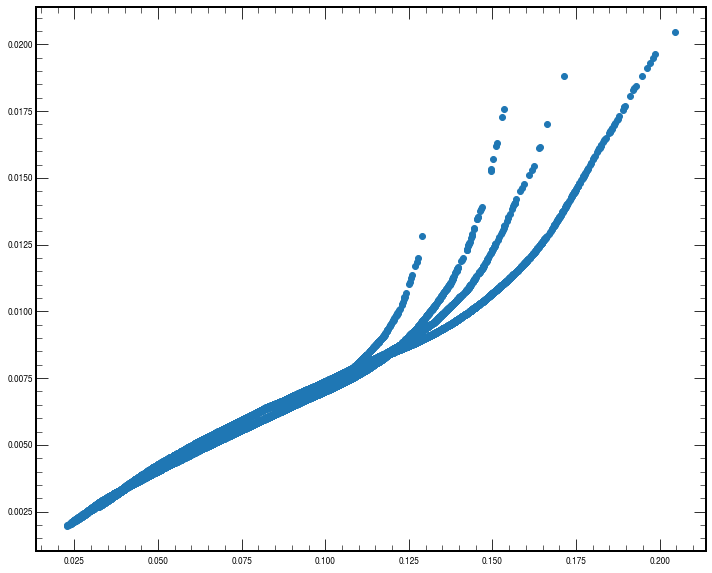

In [11]:
fig = plt.figure( figsize=(12,10) )
plt.plot( df_signals_protons_multiRP_index[ label_ ][ "xi_nom" ], df_signals_protons_multiRP_index[ label_ ][ "sigma_xi" ], 'o' )

In [ ]:
msk_columns_eff_ = [ key_[:len('eff')] == 'eff' for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_eff_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_eff_ ]
columns_ = [ "period" ]
columns_.extend( columns_eff_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

In [12]:
msk_columns_sf_ = [ key_.find( 'sf' ) >= 0 for key_ in df_signals_protons_multiRP_index[ label_ ].columns ]
columns_sf_ = df_signals_protons_multiRP_index[ label_ ].columns[ msk_columns_sf_ ]
columns_ = [ "period" ]
columns_.extend( columns_sf_ )
df_signals_protons_multiRP_index[ label_ ][ columns_ ]

period  jet0_jer_sf  jet0_jer_sfup  \
run lumiblock event  slice                                       
1   2266      226549 0       2017D       1.1432         1.1654   
              226551 0      2017F3       1.0989         1.1444   
                     0      2017F3       1.0989         1.1444   
    2267      226605 0      2017F2       1.1432         1.1654   
              226690 0      2017C1       1.1432         1.1654   
    2268      226716 0      2017F2       1.1137         1.2533   
              226773 0       2017E       1.1815         1.2299   
    2270      226932 0       2017B       1.1432         1.1654   
                     0       2017B       1.1432         1.1654   
    2273      227227 0      2017F2       1.1432         1.1654   
                     0      2017F2       1.1432         1.1654   
    2274      227321 0      2017C1       1.1815         1.2299   
              227328 0      2017C1       1.1432         1.1654   
              227324 0       2017E       1.1815         1.2299   
    2275      227457 0       2017E       1.1307         1.2778   
                     0       2017E       1.1307         1.2778   
    2276      227546 0      2017C2       1.1432         1.1654   
                     0      2017C2       1.1432         1.1654   
              227579 0       2017E       1.1432         1.1654   
                     0       2017E       1.1432         1.1654   
    2277      227611 0      2017C1       1.1815         1.2299   
              227610 0      2017C2       1.1307         1.2778   
              227661 0       2017D       1.1432         1.1654   
    2278      227745 0       2017E       1.1307         1.2778   
    2279      227825 0      2017C1       1.1432         1.1654   
              227868 0       2017E       1.0989         1.1444   
    2280      227969 0       2017E       1.1432         1.1654   
    2282      228117 0      2017C1       1.1432         1.1654   
                     0      2017C1       1.1432         1.1654   
              228121 0      2017C1       1.2393         1.4301   
...                            ...          ...            ...   
    9019      401833 0       2017E       1.1432         1.1654   
              401874 0      2017C1       1.1137         1.2533   
                     0      2017C1       1.1137         1.2533   
    9021      402066 0       2017E       1.0989         1.1444   
                     0       2017E       1.0989         1.1444   
              402070 0       2017E       1.1432         1.1654   
              402092 0       2017E       1.1307         1.2778   
    9024      402306 0      2017F3       1.1432         1.1654   
              402311 0       2017D       1.1432         1.1654   
              402331 0      2017F2       1.1307         1.2778   
              402381 0       2017D       1.1432         1.1654   
    9026      402504 0       2017E       1.0989         1.1444   
    9039      403821 0       2017D       1.1432         1.1654   
    9041      404017 0       2017B       1.0989         1.1444   
              404092 0       2017D       1.1815         1.2299   
              404091 0      2017F2       1.0989         1.1444   
    9042      404200 0       2017E       1.1432         1.1654   
    9043      404249 0      2017F2       1.4085         1.6105   
    9049      404804 0      2017F2       1.1307         1.2778   
              404867 0      2017C1       1.1432         1.1654   
              404859 0      2017F2       1.0989         1.1444   
              404880 0       2017D       1.1815         1.2299   
    9050      404965 0       2017E       1.1432         1.1654   
              404983 0      2017F2       1.1307         1.2778   
    9051      405005 0      2017F3       1.2393         1.4301   
              405030 0      2017F3       1.1432         1.1654   
    9052      405137 0      2017C2       1.1432         1.1654   
    9057      405631 0       2017E       1.1432         1.1654   
  

In [ ]:
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero_weighted" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_proton_all" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_multitrack" ] ) )
print ( np.mean( df_signals_protons_multiRP_index[ label_ ][ "eff_strictzero" ] ) )

In [ ]:
df_protons_multiRP_groupby = df_signals_protons_multiRP_index[ label_ ][ [ "arm" ] ].groupby( ["run","lumiblock","event","slice"] )
msk_2protons = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) >= 1 ) )
msk_1proton_Arm0 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) >= 1 ) & ( np.sum( s_ == 1 ) == 0 ) )
msk_1proton_Arm1 = df_protons_multiRP_groupby[ "arm" ].transform( lambda s_: ( np.sum( s_ == 0 ) == 0 ) & ( np.sum( s_ == 1 ) >= 1 ) )
print ( msk_2protons )
print ( msk_1proton_Arm0 )
print ( msk_1proton_Arm1 )

In [ ]:
df_signals_protons_multiRP_index[ label_ ][ msk_2protons ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm0 ]
# df_signals_protons_multiRP_index[ label_ ][ msk_1proton_Arm1 ]

In [ ]:
df_signals_protons_multiRP_events[ label_ ]

In [ ]:
msk_columns_MX_ = [ key_.find( 'MX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_MX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_MX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

In [ ]:
msk_columns_YX_ = [ key_.find( 'YX' ) >= 0 for key_ in df_signals_protons_multiRP_events[ label_ ].columns ]
columns_YX_ = df_signals_protons_multiRP_events[ label_ ].columns[ msk_columns_YX_ ]
columns_ = [ "period" ]
columns_.extend( columns_YX_ )
df_signals_protons_multiRP_events[ label_ ][ columns_ ]

In [ ]:
label_ = "GGToWW-AQGC-A0W1e-6"

msk_MWW = ( df_signals_protons_multiRP_events[ label_ ][ "MWW_nom" ] >= 500. )
print ( msk_MWW )

fig = plt.figure( figsize=(12,10) )

plt.hist( df_signals_protons_multiRP_events[ label_ ][ "jet0_pt" ][ msk_MWW ], histtype='step', color="darkblue", linestyle="-", bins=100, range=( 0., 1000. ) )

In [ ]:
label_ = "GGToWW-AQGC-A0W5e-6"
df_protons_multiRP_signal_index_ = df_signals_protons_multiRP_index[ label_ ]

msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_signal_index_[ "trackx1" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk1 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_signal_index_[ "trackx2" ][ msk2 ], df_protons_multiRP_signal_index_[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_signal_index_[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_signal_index_[ "arm" ] == 1 )

print ( len(df_protons_multiRP_signal_index_[ "xi" ][ msk1 ]), len(df_protons_multiRP_signal_index_[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk1 ], df_protons_multiRP_signal_index_[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_signal_index_[ "xi" ][ msk2 ], df_protons_multiRP_signal_index_[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Background

In [ ]:
run_tables = True

resample_factor = 20
label = "data-random-resample_20"

fileNames_bkg = [
    "output-data-random-resample_20-2017B.h5",
    "output-data-random-resample_20-2017C.h5",
    "output-data-random-resample_20-2017D.h5",
    "output-data-random-resample_20-2017E.h5",
    "output-data-random-resample_20-2017F.h5"
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_protons_multiRP_bkg, df_protons_singleRP_bkg, df_ppstracks_bkg = 4 * [None]
df_protons_multiRP_bkg_index, df_protons_multiRP_bkg_events, df_ppstracks_bkg_index = 3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:
        df_counts_bkg_list_ = []
        df_protons_multiRP_bkg_index_list_ = []
        df_protons_multiRP_bkg_events_list_ = []
        df_ppstracks_bkg_index_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_protons_multiRP_bkg_, df_protons_singleRP_bkg_, df_ppstracks_bkg_ = get_data( [ file_ ] )
            df_protons_multiRP_bkg_index_, df_protons_multiRP_bkg_events_, df_ppstracks_bkg_index_ = process_data_protons_multiRP( df_protons_multiRP_bkg_, df_ppstracks_bkg_, apply_fiducial=True, within_aperture=True, random_protons=True, runOnMC=False )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index_ )
            df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_ )
            df_ppstracks_bkg_index_list_.append( df_ppstracks_bkg_index_ )
            
        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[ idx_ ] )

        df_protons_multiRP_bkg_index_ = pd.concat( df_protons_multiRP_bkg_index_list_ )
        df_protons_multiRP_bkg_events_ = pd.concat( df_protons_multiRP_bkg_events_list_ )
        df_ppstracks_bkg_index_ = pd.concat( df_ppstracks_bkg_index_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "protons_multiRP"] = df_protons_multiRP_bkg_index_
        store_[ "events_multiRP" ] = df_protons_multiRP_bkg_events_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_bkg

In [ ]:
df_protons_multiRP_bkg_index

In [ ]:
df_protons_multiRP_bkg_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_bkg_index[ "trackx1" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk1 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_bkg_index[ "trackx2" ][ msk2 ], df_protons_multiRP_bkg_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_bkg_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_bkg_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_bkg_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_bkg_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk1 ], df_protons_multiRP_bkg_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_bkg_index[ "xi" ][ msk2 ], df_protons_multiRP_bkg_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

In [ ]:
labels_samples = {
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
}

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "jet0_mass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 1 ] )
df_protons_multiRP_signal_events.hist( "jet0_corrmass", bins=100, range=(0.,250.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1

df_protons_multiRP_bkg_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_, 0 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak8", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 0 ] )

df_protons_multiRP_bkg_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="lightcoral", ax=axes[ row_,  1 ] )
df_protons_multiRP_signal_events.hist( "num_bjets_ak4", bins=10, range=(0.,10.), histtype="step", density=True, color="darkblue", ax=axes[ row_, 1 ] )
row_ += 1


In [ ]:
msk_bkg = ( ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
            ( df_protons_multiRP_bkg_events.loc[ :, "jet0_corrmass"] <= 110.0 ) & 
            ( df_protons_multiRP_bkg_events.loc[ :, "num_bjets_ak4"] == 0 ) )
msk_signal = ( ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] >= 50.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "jet0_corrmass"] <= 110.0 ) &
               ( df_protons_multiRP_signal_events.loc[ :, "num_bjets_ak4"] == 0 ) )
df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events.loc[ msk_bkg ]
df_protons_multiRP_signal_events = df_protons_multiRP_signal_events.loc[ msk_signal ]

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\rm{jet}) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "jet0_tau1", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$\tau_1 (\rm{jet})$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "jet0_tau2", bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\tau_2 (\rm{jet})$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Jet.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Jet.png", bbox_inches='tight' )

#  'run', 'lumiblock', 'event', 'slice', 'xi', 'thx', 'thy', 't', 'ismultirp', 'rpid', 'arm', 
#  'jet0_pt', 'jet0_eta', 'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass', 'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 
#  'muon0_pt', 'muon0_eta', 'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso', 'muon0_dxy', 'muon0_dz', 
#  'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 
#  'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi'

In [ ]:
fig, axes = plt.subplots( 2, 2, figsize=(24,2*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_pt", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$p_{\rm{T}} (\mu) \,\rm{(GeV)}$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_eta", bins=50, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$\eta (\mu)$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

df_protons_multiRP_bkg_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="lightcoral", ax=axes[row_,0] )
df_protons_multiRP_signal_events.hist( "muon0_iso", bins=50, range=(0.,0.2), histtype="step", density=True, color="darkblue", ax=axes[row_,0] )
axes[ row_, 0 ].set_xlabel( r"$Isolation (\mu)$", fontsize=20 )
axes[ row_, 0 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="lightcoral", ax=axes[row_,1] )
df_protons_multiRP_signal_events.hist( "muon0_dz", bins=50, range=(0.,0.1), histtype="step", density=True, color="darkblue", ax=axes[row_,1] )
axes[ row_, 1 ].set_xlabel( r"$d_z (\mu) \,\rm{(cm)}$", fontsize=20 )
axes[ row_, 1 ].set_ylabel( "Density", fontsize=20 )
axes[ row_, 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Muon.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Muon.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "met", bins=50, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}}^{\rm{miss}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "met_phi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi({\vec p}_{\rm{T}}^{\rm{miss}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_MET.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_MET.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "nVertices", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( "Number of vertices", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "pfcand_nextracks", bins=100, range=(0.,100.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( "Number of extra tracks", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Vertices_ExtraTracks.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "WLeptonicPt", bins=100, range=(0.,1000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$p_{\rm{T}} (W^{\rm{lep}}) \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "WLeptonicPhi", bins=50, range=(-np.pi,np.pi), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$\phi (W^{\rm{lep}})$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_WLeptonic.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_WLeptonic.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "recoMWW", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "recoRapidityWW", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_WW.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,1*10) )

row_ = 0
df_protons_multiRP_bkg_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "MX", bins=100, range=(0.,2000.), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{\rm{pp}} \,\rm{(GeV)}$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "YX", bins=100, range=(-5.,5.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )
row_ += 1

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_protons.png", bbox_inches='tight' )

In [ ]:
fig = plt.figure( figsize=(12,10) )

plt.hist( ( df_protons_multiRP_bkg_events[ "jet0_tau2" ] / df_protons_multiRP_bkg_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="lightcoral" )
plt.hist( ( df_protons_multiRP_signal_events[ "jet0_tau2" ] / df_protons_multiRP_signal_events[ "jet0_tau1" ] ), bins=50, range=(0.,1.), histtype="step", density=True, color="darkblue" )
plt.xlabel( r"$\tau_{21}$", fontsize=20 )
plt.ylabel( "Density", fontsize=20 )
plt.title( "" )

if save_figures:
    plt.savefig( "plots/Variables_tau21.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_tau21.png", bbox_inches='tight' )

In [ ]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

df_protons_multiRP_bkg_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="lightcoral", ax=axes[0] )
df_protons_multiRP_signal_events.hist( "shiftedRatioMWW_MX", bins=50, range=(-1.5,1.5), histtype="step", density=True, color="darkblue", ax=axes[0] )
axes[ 0 ].set_xlabel( r"$M_{WW} / M_{\rm{pp}} - 1$", fontsize=20 )
axes[ 0 ].set_ylabel( "Density", fontsize=20 )
axes[ 0 ].set_title( "" )

df_protons_multiRP_bkg_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="lightcoral", ax=axes[1] )
df_protons_multiRP_signal_events.hist( "diffYWW_YX", bins=50, range=(-3.,3.), histtype="step", density=True, color="darkblue", ax=axes[1] )
axes[ 1 ].set_xlabel( r"$Y_{WW} - Y_{\rm{pp}}$", fontsize=20 )
axes[ 1 ].set_ylabel( "Density", fontsize=20 )
axes[ 1 ].set_title( "" )

if save_figures:
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Variables_Mass_Rapidity_difference.png", bbox_inches='tight' )

In [ ]:
msk_bkg_cut1 = ( np.abs( df_protons_multiRP_bkg_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_bkg_cut2 = ( np.abs( df_protons_multiRP_bkg_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_bkg_events[ msk_bkg_A ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightblue' )
df_protons_multiRP_bkg_events[ msk_bkg_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_bkg_events[ msk_bkg_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_bkg   = df_protons_multiRP_bkg_events.shape[0]
n_events_bkg_A = df_protons_multiRP_bkg_events[ msk_bkg_A ].shape[0]
n_events_bkg_B = df_protons_multiRP_bkg_events[ msk_bkg_B ].shape[0]
n_events_bkg_C = df_protons_multiRP_bkg_events[ msk_bkg_C ].shape[0]
n_events_bkg_D = df_protons_multiRP_bkg_events[ msk_bkg_D ].shape[0]
resample_factor = 20
print ( "Number of events: {}".format( n_events_bkg / resample_factor ) )
print ( "Number of events (A): {}".format( n_events_bkg_A / resample_factor ) )
print ( "Number of events (B): {}".format( n_events_bkg_B / resample_factor ) )
print ( "Number of events (C): {}".format( n_events_bkg_C / resample_factor ) )
print ( "Number of events (D): {}".format( n_events_bkg_D / resample_factor ) )

### Data

In [ ]:
run_tables = True

label = "data"

fileNames_data = [
    'output-data-2017B.h5',
    'output-data-2017C.h5',
    'output-data-2017D.h5',
    'output-data-2017E.h5',
    'output-data-2017F.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = 4 * [None]
df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index =  3 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data, df_protons_multiRP_data, df_protons_singleRP_data, df_ppstracks_data = get_data( fileNames_data )
        df_protons_multiRP_data_index, df_protons_multiRP_data_events, df_ppstracks_data_index = process_data_protons_multiRP( df_protons_multiRP_data, df_ppstracks_data, apply_fiducial=True, within_aperture=True, runOnMC=False )

        store_[ "counts" ] = df_counts_data
        store_[ "protons_multiRP"] = df_protons_multiRP_data_index
        store_[ "events_multiRP" ] = df_protons_multiRP_data_events

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_data = store_[ "counts" ]
    df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
    df_protons_multiRP_data_events = store_[ "events_multiRP" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

In [ ]:
with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    print ( list( store_ ) )

In [ ]:
df_counts_data

In [ ]:
df_protons_multiRP_data_index

In [ ]:
df_protons_multiRP_data_events

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 2, 2, figsize=(24,20) )
axes[0,0].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk1 ], df_protons_multiRP_data_index[ "tracky1" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,0].set_xlabel( "X (mm)", fontsize=20 )
axes[0,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[0,1].hist2d( df_protons_multiRP_data_index[ "trackx1" ][ msk2 ], df_protons_multiRP_data_index[ "tracky1" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[0,1].set_xlabel( "X (mm)", fontsize=20 )
axes[0,1].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,0].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk1 ], df_protons_multiRP_data_index[ "tracky2" ][ msk1 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,0].set_xlabel( "X (mm)", fontsize=20 )
axes[1,0].set_ylabel( "Y (mm)", fontsize=20 )
axes[1,1].hist2d( df_protons_multiRP_data_index[ "trackx2" ][ msk2 ], df_protons_multiRP_data_index[ "tracky2" ][ msk2 ], bins=(100,100), range=( (0.,25.), (-10.,10.) ), norm=LogNorm(), cmap='viridis' )
axes[1,1].set_xlabel( "X (mm)", fontsize=20 )
axes[1,1].set_ylabel( "Y (mm)", fontsize=20 )
if save_figures:
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Hit_Map_Data_vs_Sector_Near_Far.png", bbox_inches='tight' )

In [ ]:
msk1 = None
msk2 = None
msk1 = ( df_protons_multiRP_data_index[ "arm" ] == 0 )
msk2 = ( df_protons_multiRP_data_index[ "arm" ] == 1 )

print ( len(df_protons_multiRP_data_index[ "xi" ][ msk1 ]), len(df_protons_multiRP_data_index[ "xi" ][ msk2 ]) )

fig, axes = plt.subplots( 1, 2, figsize=(24,10) )
h_, xedges_, yedges_, im_ = axes[0].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk1 ], df_protons_multiRP_data_index[ "thx" ][ msk1 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[0].set_xlabel( r"$\xi$", fontsize=20 )
axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
h_, xedges_, yedges_, im_ = axes[1].hist2d( df_protons_multiRP_data_index[ "xi" ][ msk2 ], df_protons_multiRP_data_index[ "thx" ][ msk2 ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
axes[1].set_xlabel( r"$\xi$", fontsize=20 )
axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
if save_figures:
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.pdf", bbox_inches='tight' )
    plt.savefig( "plots/ThetaX_vs_Xi_Data_vs_Sector.png", bbox_inches='tight' )

In [ ]:
msk_data = ( ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] >= 50.0 ) & ( df_protons_multiRP_data_events.loc[ :, "jet0_corrmass"] <= 110.0 ) )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.loc[ msk_data ]

In [ ]:
msk_data_cut1 = ( np.abs( df_protons_multiRP_data_events[ "shiftedRatioMWW_MX" ] ) <= 0.30 )
msk_data_cut2 = ( np.abs( df_protons_multiRP_data_events[ "diffYWW_YX" ] ) <= 0.50 )
msk_data_A =  msk_data_cut1 &  msk_data_cut2
msk_data_B = ~msk_data_cut1 &  msk_data_cut2
msk_data_C =  msk_data_cut1 & ~msk_data_cut2
msk_data_D = ~msk_data_cut1 & ~msk_data_cut2
msk_data = ~msk_data_A

In [ ]:
x_min = -1.5
x_max =  1.5
y_min = -3.0
y_max =  3.0
x_center = ( x_min + x_max ) / 2.
y_center = ( y_min + y_max ) / 2.

fig = plt.figure( figsize=(12,10) )
plt.plot( (x_min,x_max), (y_center,y_center), color='gray' )
plt.plot( (x_center,x_center), (y_min,y_max), color='gray' )
ax = plt.gca()
df_protons_multiRP_data_events[ msk_data_B ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_C ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='darkblue' )
df_protons_multiRP_data_events[ msk_data_D ].plot( "shiftedRatioMWW_MX", "diffYWW_YX", 'scatter', ax=ax, color='lightcoral' )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

n_events_data_B = df_protons_multiRP_data_events[ msk_data_B ].shape[0]
n_events_data_C = df_protons_multiRP_data_events[ msk_data_C ].shape[0]
n_events_data_D = df_protons_multiRP_data_events[ msk_data_D ].shape[0]
resample_factor = 20
print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B / resample_factor ) ) ) )
print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C / resample_factor ) ) ) )
print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D / resample_factor ) ) ) )

### References